# Interpolating Multi-Dimensional Data

In this tutorial, we will be using Kadlu to interpolate multi-dimensional data arrays. In particular, we will show how to interpolate, unstructured bathymetric data using Kadlu's `interp_2D` class. 

As always, we begin by importing all necessary modules, classes, functions, etc.

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
from kadlu.geospatial.interpolation import interp_2D, interp_3D
from kadlu import chs, era5, hycom, wwiii

NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/s

For this exersise, we will consider bathymetric data from the Canadian Hydrography Servicethe (CHS) for the geographic region $47^o$N to $49^o$N and $-63^o$W to $-61^o$W:

In [3]:
# load some data to interpolate
bathy, lat, lon = chs().load_bathymetry(
        south=47, west=-63, 
        north=49, east=-61)

NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
CHS CA2_4600N06100W.tif bathymetry: downloading 1/16 from CHS NONNA-100...
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
CHS CA2_4600N06200W.tif bathymetry: downloading 2/16 from CHS NONNA-100...
NOTICE: missing kadlu/config.ini. storage location will be set to /home/oliskir/src/anaconda3/envs/kadlu_env/lib/python3.6/site-packages/storage/
CHS CA2_4600N06300W.tif bathymetry: downloading 3/16 from CHS NONNA-100...
NOTICE: missing kadlu/config.ini. storage loc

Note that the bathymetric data provided by CHS is unstructured, i.e., the data points to not lie on a nice, regular grid. This is easily verified by making a scatter plot of the latitude-longitude coordinates, as done below

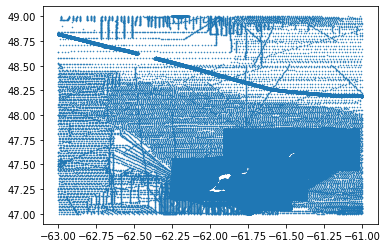

In [7]:
# plot lat-lon coordinates
fig = plt.plot(lon, lat, '.', markersize=1)

In order to interpolate the bathymetric data, we initialize an instance of the `interp_2D` class. (Note that Kadlu also has a `interp_3D` class for three-dimensional data arrays, such as temperature and salinity, which depend not only on latitude and longitude, but also on depth.)

In [9]:
interpolator = interp_2D(values=bathy, lats=lat, lons=lon)  # create interpolator

Now, we can use the interpolator to query for approximate bathymetric values at any set of coordinate pairs. For example, the query

In [10]:
interpolator.interp(lat=[47.5, 48, 48.5], lon=[-62.5, -62, -61.5])

array([ -86.48713832,  -60.37952206, -412.38104893])

returns the bathymetric values, i.e., the elevation of the seafloor, at the coordinates ($47.5^{\circ}$N,$-62.5^{\circ}$W), ($48.0^{\circ}$N,$-62.0^{\circ}$W) and ($48.5^{\circ}$N,$-61.5^{\circ}$W).

One can also query on a regular coordinate grid, using the grid keyword argument,

In [11]:
interpolator.interp(lat=[47, 47.5, 48, 48.5, 49], lon=[-62.5, -62], grid=True)

array([[ -64.48025635,  -49.66592687],
       [ -86.48713832,  -26.06655108],
       [ -74.7640341 ,  -60.37952206],
       [-391.58123939, -431.82508919],
       [-223.19865983,  -44.91486619]])